# standardize_grid

- Resample images to standard grid using a 5m geotiff
- Remove those that do not cover any of the glacier

In [12]:
import rasterio as rio
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
from rasterio.warp import reproject, Resampling
from osgeo import gdal
import shutil
import geopandas as gpd

### Glacier shapefile

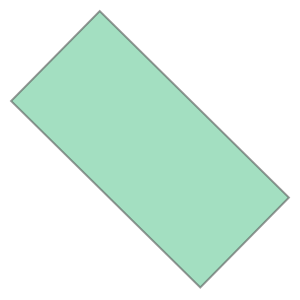

In [26]:
# path to study area shapefile
aoi_shp = '/Users/jukesliu/Documents/TURNER/DATA/shapefiles_gis/BoxTurner_UTM_07.shp'
aoi_gdf = gpd.read_file(aoi_shp)
aoi = aoi_gdf.geometry.values
aoi[0]

### Read in DEM (or any 5m resolution geotiff) that is clipped to the AOI used to download the images

In [21]:
##############
dempath = '/Users/jukesliu/Documents/TURNER/DATA/VELOCITY_MAPS/forAutoRIFT/IfSAR_DSM_5m_cropped.tif'
##############

In [22]:
dsm = rio.open(dempath) # open using rasterio
elev = dsm.read(1) # read in the first and only band (elevations)
dsm_resolution = dsm.transform[0]
print(dsm_resolution)

4.979215071770336


### Grab the spatial information (that the images will be standardized to)

In [23]:
# grab the x and y grid values for the DSM
dsm_x = np.linspace(dsm.bounds.left, dsm.bounds.right, num=np.shape(elev)[1])
dsm_y = np.linspace(dsm.bounds.top, dsm.bounds.bottom, num=np.shape(elev)[0])

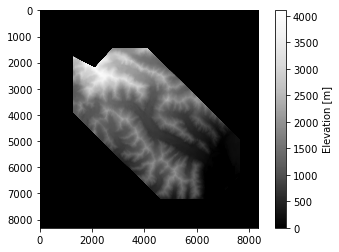

In [24]:
# Display the raster
fig, ax1 = plt.subplots(1,1)
hs_im = ax1.imshow(elev, cmap='Greys_r', vmin=0)
fig.colorbar(hs_im, ax=ax1,label='Elevation [m]')
plt.show()

# Standardize all images in a folder to the DEM

20200311_200122_0e26_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3061, 949)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_200122_0e26_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_200122_0e26_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17379.46152609461


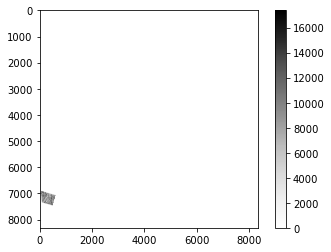

20200312_192159_76_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2754, 2023)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_192159_76_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_192159_76_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21154.06685538449


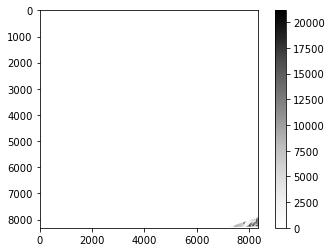

20200311_201006_1008_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (359, 3808)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_201006_1008_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_201006_1008_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19174.535980777295


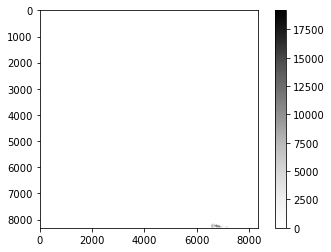

20200314_201145_0f28_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4934, 313)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200314_201145_0f28_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200314_201145_0f28_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18710.811721068047


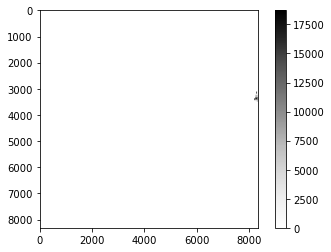

20200314_173229_0f2e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2790, 1700)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200314_173229_0f2e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200314_173229_0f2e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 31006.262645446117


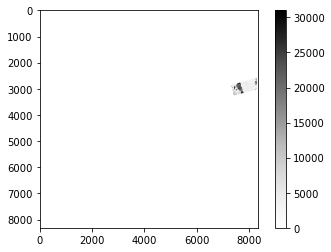

20200313_192302_55_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1956, 5072)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200313_192302_55_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200313_192302_55_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8525.595108279185


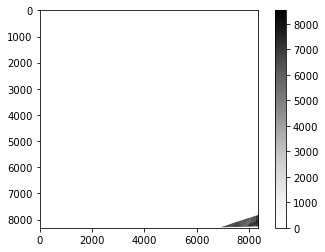

20200307_192642_16_106c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1678, 1599)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200307_192642_16_106c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200307_192642_16_106c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8093.545800246564


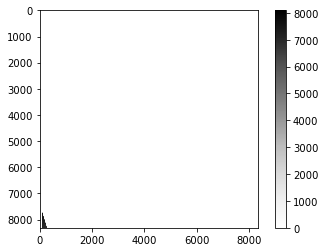

20200314_173227_0f2e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4535, 629)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200314_173227_0f2e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200314_173227_0f2e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19750.500731319924


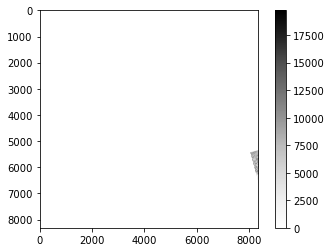

20200311_200116_0e26_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (228, 5157)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_200116_0e26_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_200116_0e26_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20711.874358810794


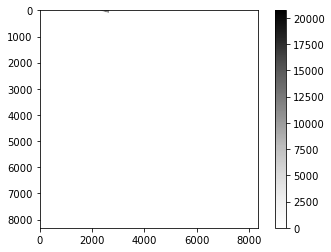

20200304_203531_13_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1429, 3452)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200304_203531_13_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200304_203531_13_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 9722.561006702366


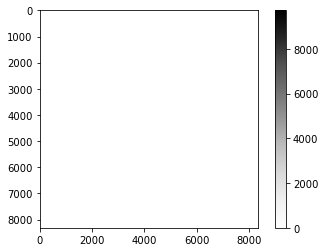

20200302_204103_24_105a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1528, 9526)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_204103_24_105a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_204103_24_105a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10728.979474542883


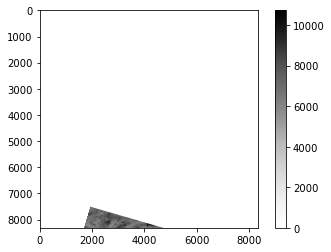

20200307_192644_21_106c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6366, 149)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200307_192644_21_106c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200307_192644_21_106c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8001.926580578296


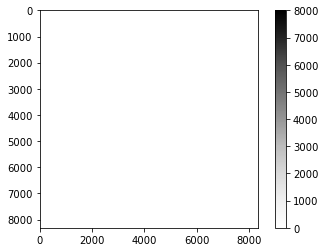

20200315_200934_1008_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1305, 1006)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_200934_1008_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_200934_1008_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17899.62093979183


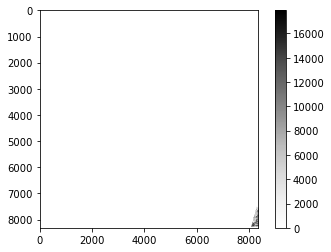

20200304_203523_02_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1431, 9232)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200304_203523_02_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200304_203523_02_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 9665.013583868436


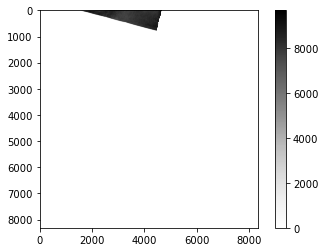

20200306_204115_71_105d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1718, 7485)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200306_204115_71_105d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200306_204115_71_105d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20919.403124437114


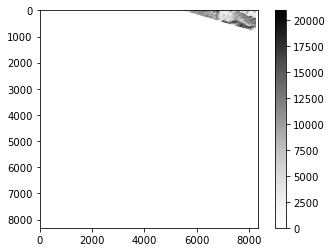

20200311_201001_1008_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4966, 397)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_201001_1008_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_201001_1008_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 24018.19168593166


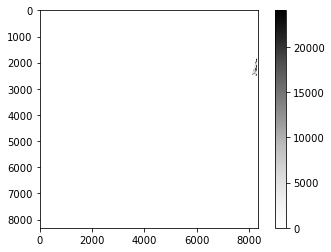

20200314_201150_0f28_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1199, 2962)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200314_201150_0f28_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200314_201150_0f28_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18405.314356456907


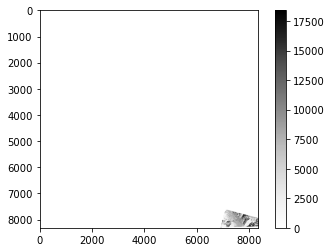

20200311_192921_53_106c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5274, 1965)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_192921_53_106c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_192921_53_106c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21792.7846324877


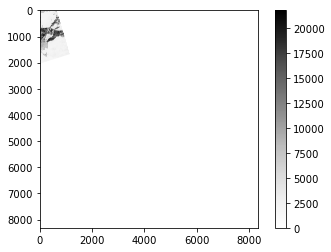

20200311_201002_1008_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4952, 1139)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_201002_1008_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_201002_1008_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23593.0555714318


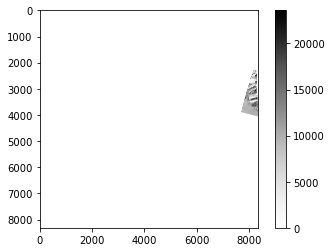

20200302_192335_65_106b_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1938, 10039)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_192335_65_106b_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_192335_65_106b_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11826.555100417281


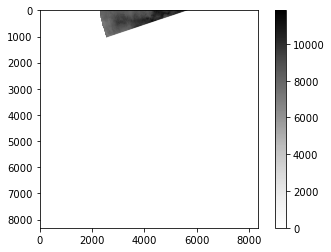

20200312_201226_101f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2426, 6018)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201226_101f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201226_101f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14821.586641582735


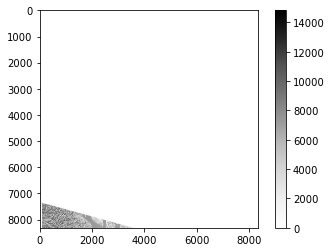

20200316_172913_0f32_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2224, 4524)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_172913_0f32_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_172913_0f32_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16593.924494165538


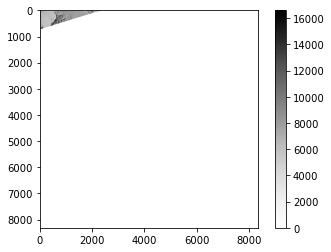

20200314_201148_0f28_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4983, 1697)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200314_201148_0f28_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200314_201148_0f28_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14595.766583562687


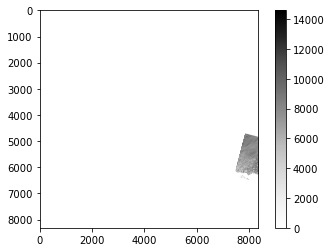

20200301_192304_14_106f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (670, 5135)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200301_192304_14_106f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200301_192304_14_106f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11701.478691222906


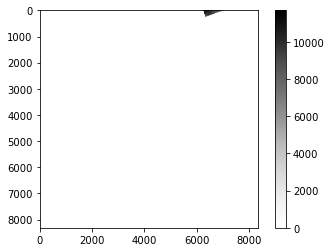

20200316_172907_0f32_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1259, 8388)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_172907_0f32_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_172907_0f32_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11349.68447961369


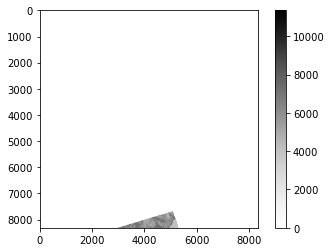

20200311_201003_1008_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4986, 1844)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_201003_1008_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_201003_1008_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22879.766914283326


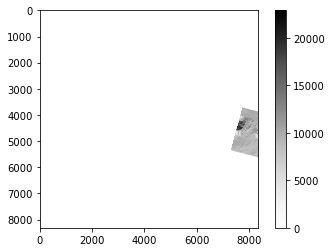

20200312_201219_101f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2180, 9124)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201219_101f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201219_101f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19751.071426128467


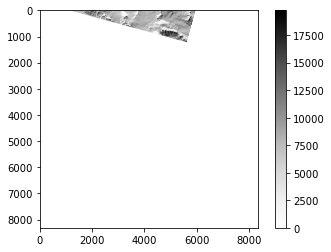

20200314_173228_0f2e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4101, 1074)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200314_173228_0f2e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200314_173228_0f2e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 26306.47546437726


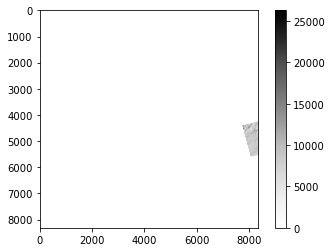

20200312_201604_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (92, 4522)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201604_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201604_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 0.0


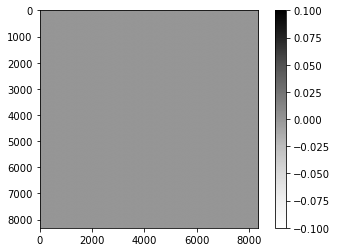

20200312_192208_09_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (540, 7931)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_192208_09_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_192208_09_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20031.24705735698


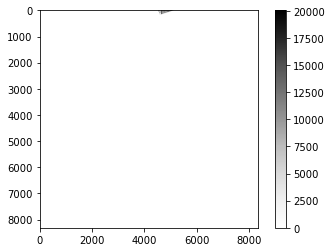

20200312_201557_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2364, 3946)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201557_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201557_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20599.659913030806


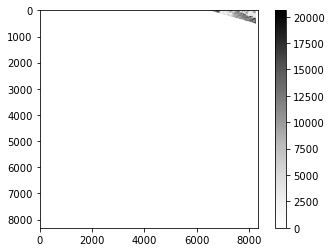

20200304_203529_10_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6009, 4798)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200304_203529_10_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200304_203529_10_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16924.958011567294


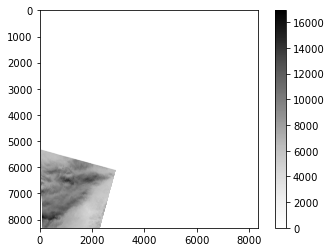

20200313_201357_1012_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1953, 7231)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200313_201357_1012_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200313_201357_1012_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8371.089327852038


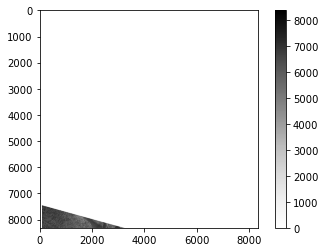

20200301_192302_09_106f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5318, 3635)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200301_192302_09_106f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200301_192302_09_106f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15683.478684525742


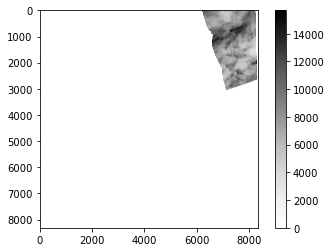

20200315_200933_1008_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3724, 362)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_200933_1008_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_200933_1008_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16234.061970624152


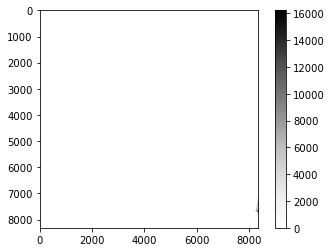

20200314_201147_0f28_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4961, 1013)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200314_201147_0f28_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200314_201147_0f28_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18627.66793358797


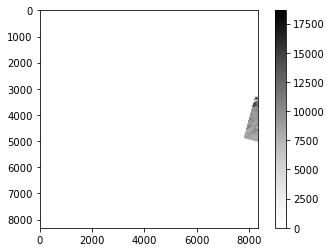

20200308_203623_00_105e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3077, 3362)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200308_203623_00_105e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200308_203623_00_105e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 9899.380682033232


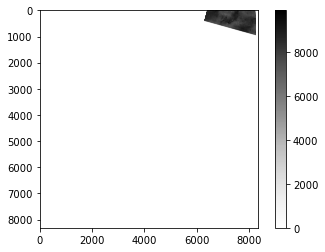

20200303_204228_95_1058_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (421, 6244)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200303_204228_95_1058_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200303_204228_95_1058_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16479.85568634851


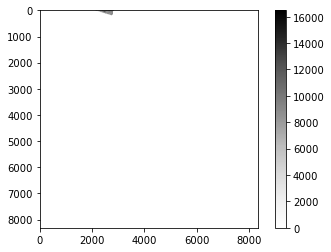

20200312_201225_101f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4857, 6714)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201225_101f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201225_101f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18632.66029250191


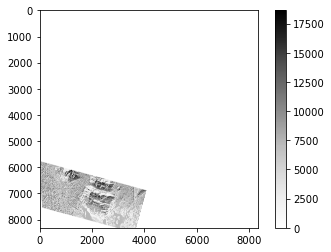

20200315_201743_1032_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1817, 7260)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_201743_1032_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_201743_1032_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19034.19339935769


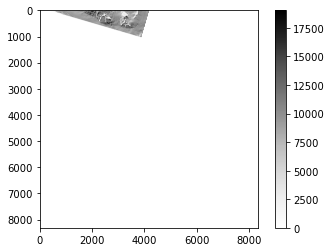

20200308_203629_15_105e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4289, 7556)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200308_203629_15_105e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200308_203629_15_105e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10560.442957382484


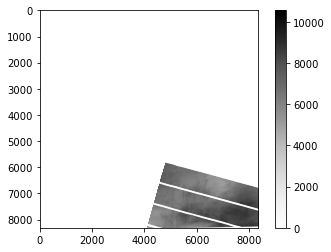

20200311_201005_1008_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2780, 3172)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_201005_1008_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_201005_1008_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23082.564920734847


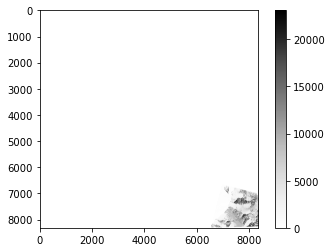

20200313_203931_35_105a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5256, 4662)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200313_203931_35_105a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200313_203931_35_105a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 32472.45091907548


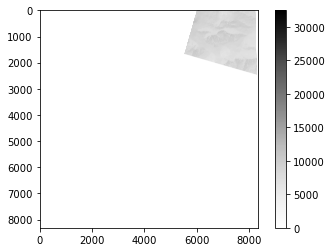

20200303_192406_15_106c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3714, 9891)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200303_192406_15_106c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200303_192406_15_106c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14809.55827807756


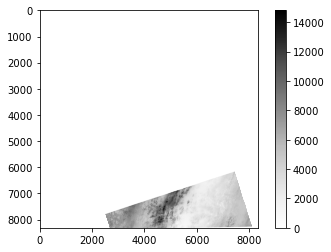

20200318_192601_04_106a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1246, 9676)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200318_192601_04_106a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200318_192601_04_106a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10088.17891579131


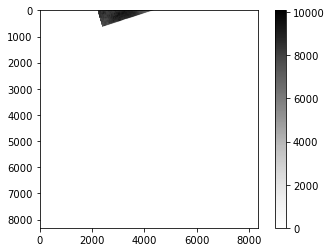

20200319_192624_39_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (320, 9316)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200319_192624_39_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200319_192624_39_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 7075.206896379163


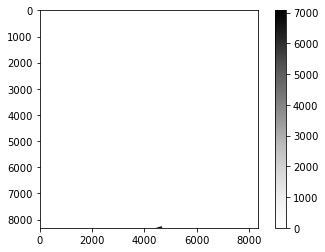

20200312_201221_101f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4592, 9115)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201221_101f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201221_101f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19987.339081899016


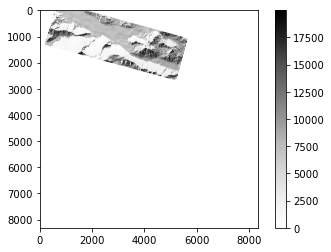

20200315_201749_1032_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2907, 2973)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_201749_1032_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_201749_1032_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15553.765974322654


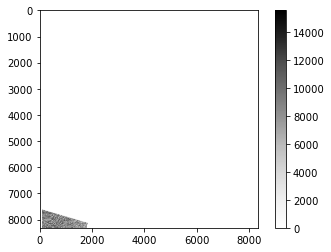

20200303_204235_06_1058_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7308, 2484)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200303_204235_06_1058_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200303_204235_06_1058_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20763.72677733086


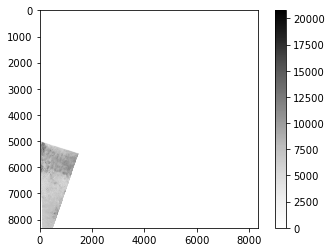

20200311_192917_42_106c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7287, 4829)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_192917_42_106c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_192917_42_106c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22644.47515655618


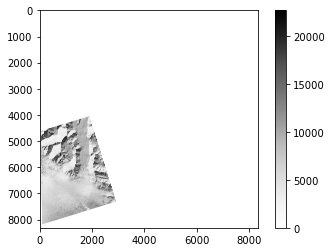

20200312_201558_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4755, 4677)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201558_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201558_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21930.680203355798


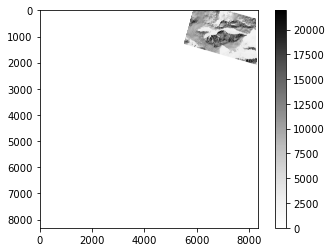

20200311_201004_1008_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4988, 2534)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_201004_1008_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_201004_1008_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20575.14347470843


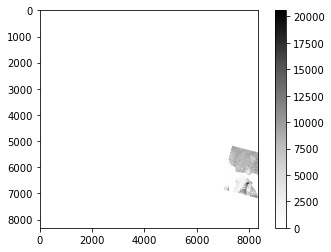

20200312_201601_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5149, 6958)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201601_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201601_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21402.018967988963


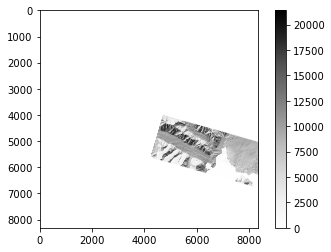

20200312_201222_101f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5026, 8761)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201222_101f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201222_101f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21594.101301405695


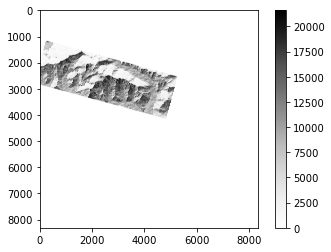

20200303_204233_02_1058_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7791, 4067)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200303_204233_02_1058_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200303_204233_02_1058_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 25945.311247167378


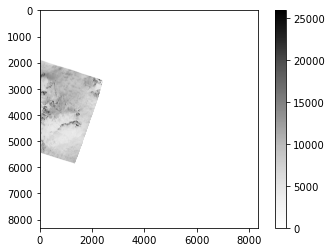

20200308_203625_05_105e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7647, 4837)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200308_203625_05_105e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200308_203625_05_105e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15675.339925150163


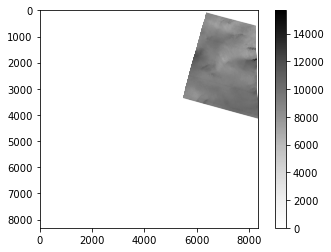

20200319_195420_0e19_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2051, 1423)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200319_195420_0e19_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200319_195420_0e19_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18990.375906358342


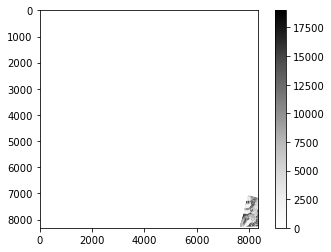

20200301_192257_98_106f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7536, 901)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200301_192257_98_106f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200301_192257_98_106f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14482.968432252192


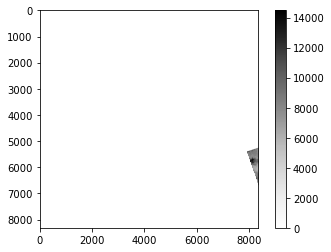

20200316_192429_47_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1884, 9856)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_192429_47_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_192429_47_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8496.615538690616


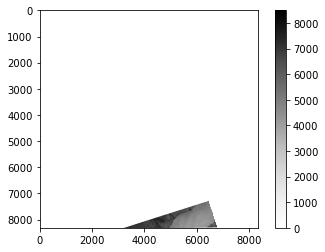

20200302_204055_04_105a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1413, 6727)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_204055_04_105a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_204055_04_105a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10207.655776628046


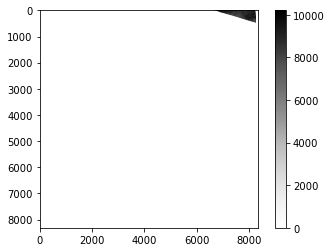

20200316_192437_83_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1149, 6458)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_192437_83_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_192437_83_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 6938.216821759022


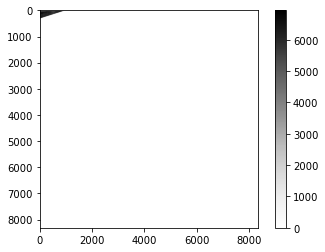

20200304_192444_54_1068_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4919, 6589)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200304_192444_54_1068_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200304_192444_54_1068_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14847.328474390753


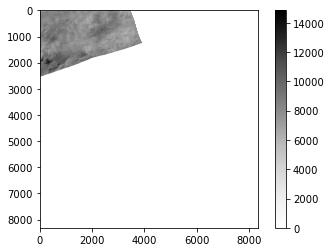

20200315_201747_1032_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5216, 4420)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_201747_1032_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_201747_1032_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18269.472052886467


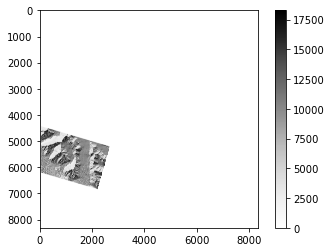

20200317_201847_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5208, 1932)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_201847_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_201847_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16392.62174770547


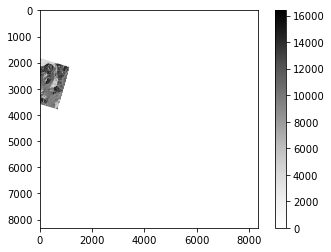

20200304_192438_37_1068_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3418, 10129)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200304_192438_37_1068_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200304_192438_37_1068_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10377.599139372607


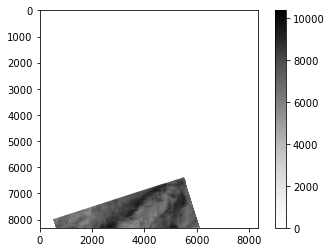

20200312_201603_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2478, 8334)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201603_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201603_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20098.590065422566


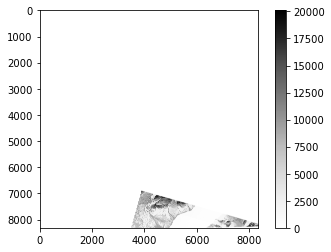

20200315_201748_1032_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5233, 3692)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_201748_1032_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_201748_1032_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16561.933476346938


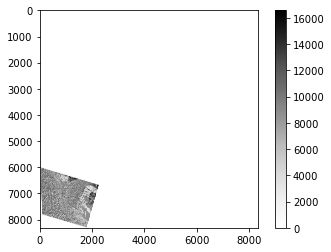

20200319_192632_65_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2766, 3635)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200319_192632_65_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200319_192632_65_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17955.26443837229


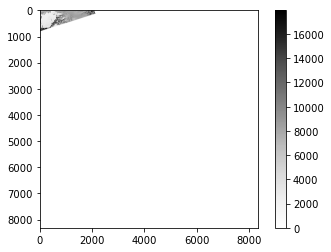

20200323_173029_1_0f49_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5265, 1136)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200323_173029_1_0f49_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200323_173029_1_0f49_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22709.908339333462


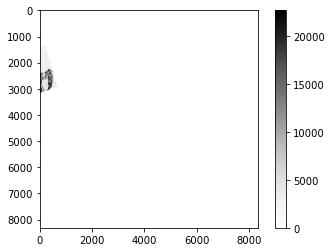

20200302_204057_09_105a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6159, 8208)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_204057_09_105a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_204057_09_105a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 44996.30757261394


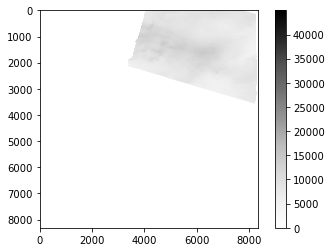

20200316_172913_1_0f32_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4429, 5209)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_172913_1_0f32_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_172913_1_0f32_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18428.109594501857


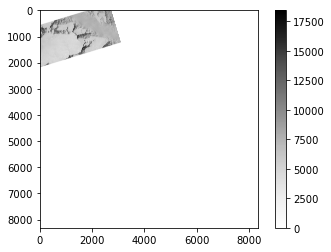

20200311_192919_48_106c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7980, 3421)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_192919_48_106c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_192919_48_106c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22782.660877753995


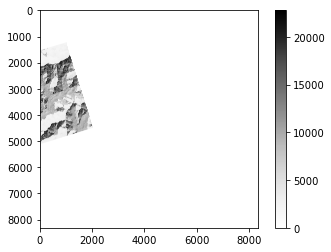

20200305_192542_62_106f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6464, 3980)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200305_192542_62_106f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200305_192542_62_106f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 27329.479243261892


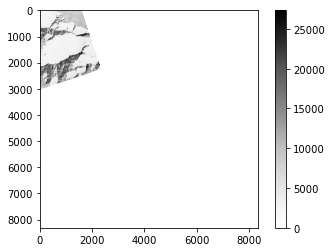

20200317_192533_26_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1982, 6050)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_192533_26_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_192533_26_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14632.838854290409


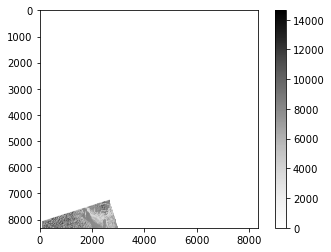

20200313_203935_49_105a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6880, 7586)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200313_203935_49_105a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200313_203935_49_105a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 48105.3627201525


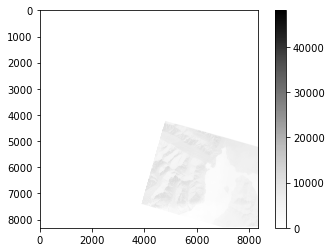

20200315_201746_1032_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5208, 5133)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_201746_1032_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_201746_1032_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18712.309178347732


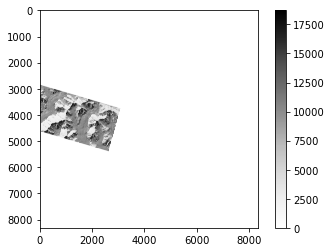

20200317_201017_100a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4962, 1538)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_201017_100a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_201017_100a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10092.748808757817


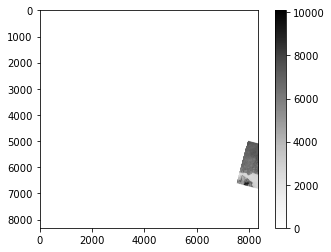

20200317_201018_100a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3090, 2191)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_201018_100a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_201018_100a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12647.364176601071


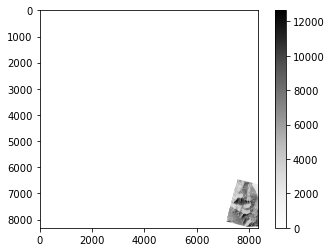

20200312_201559_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5142, 5441)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201559_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201559_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21364.310065583108


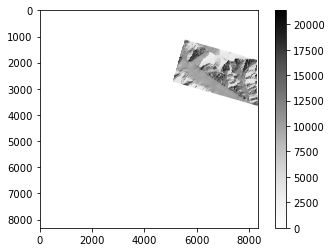

20200317_201016_100a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4949, 826)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_201016_100a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_201016_100a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10151.883994875825


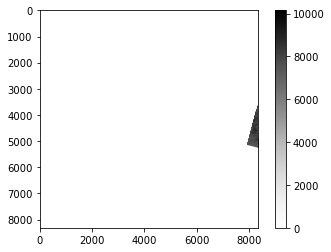

20200312_201223_101f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5026, 8081)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201223_101f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201223_101f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20329.391164060056


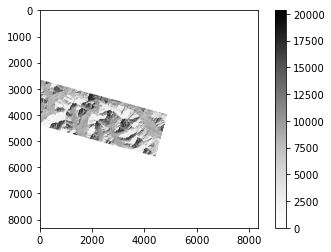

20200305_192540_56_106f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8192, 5392)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200305_192540_56_106f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200305_192540_56_106f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 27153.80001961937


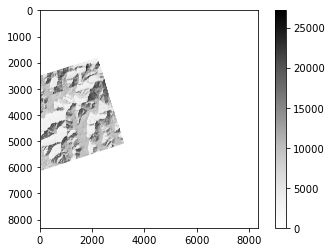

20200316_172910_0f32_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4855, 7142)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_172910_0f32_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_172910_0f32_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15555.53285530836


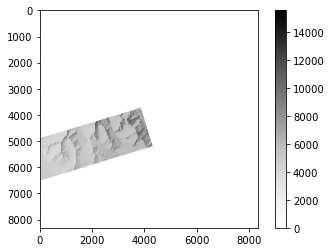

20200308_203627_10_105e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7590, 6212)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200308_203627_10_105e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200308_203627_10_105e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11473.335231617355


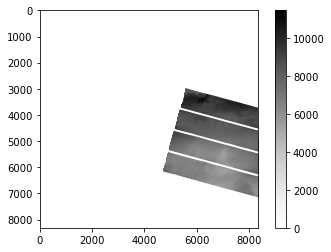

20200320_201520_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (374, 8498)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200320_201520_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200320_201520_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8198.457534976722


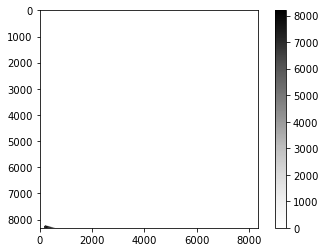

20200320_201426_103e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5088, 131)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200320_201426_103e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200320_201426_103e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8632.894122506266


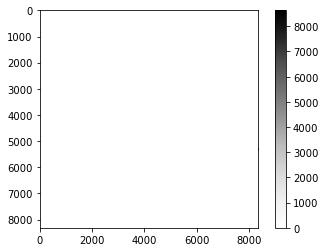

20200304_203525_05_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6075, 7575)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200304_203525_05_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200304_203525_05_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12635.242347574089


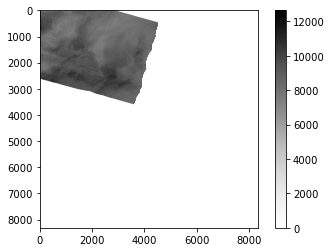

20200312_201602_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4864, 7665)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201602_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201602_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22289.886096712435


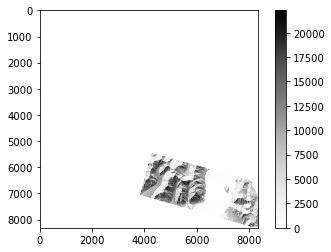

20200317_192539_56_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5651, 1714)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_192539_56_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_192539_56_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11729.150207434253


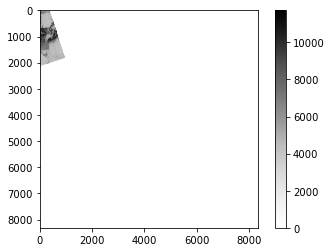

20200325_193031_72_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5642, 516)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200325_193031_72_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200325_193031_72_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 13607.165120853446


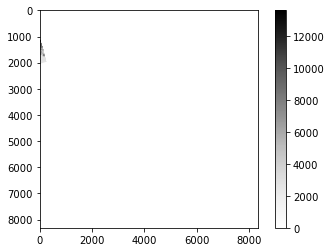

20200304_192440_43_1068_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8057, 9362)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200304_192440_43_1068_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200304_192440_43_1068_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10738.834847646143


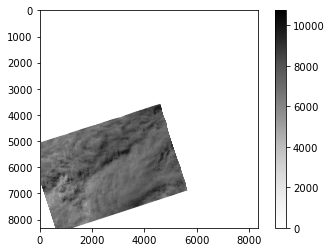

20200316_172909_0f32_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4846, 7792)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_172909_0f32_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_172909_0f32_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14588.352841058775


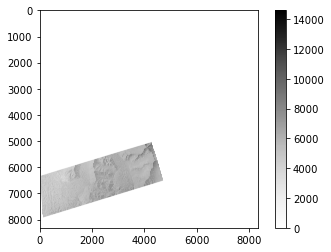

20200315_201744_1032_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4206, 6585)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_201744_1032_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_201744_1032_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21751.939606076106


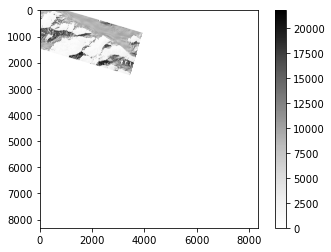

20200323_173024_0f49_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1069, 4170)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200323_173024_0f49_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200323_173024_0f49_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17502.28352649496


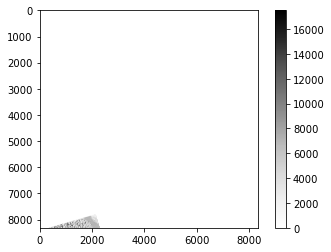

20200324_192923_32_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4127, 1487)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200324_192923_32_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200324_192923_32_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12182.033457176565


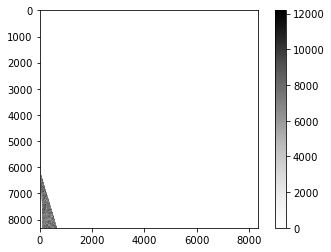

20200312_192201_85_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7528, 3596)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_192201_85_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_192201_85_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19803.95493846667


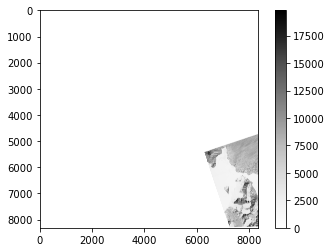

20200323_173029_0f49_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4987, 472)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200323_173029_0f49_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200323_173029_0f49_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21183.93982843804


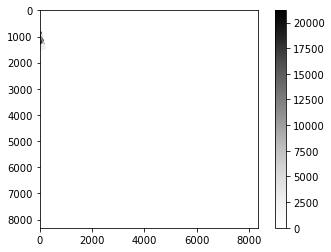

20200302_204101_19_105a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6180, 9557)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_204101_19_105a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_204101_19_105a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 49824.85907362869


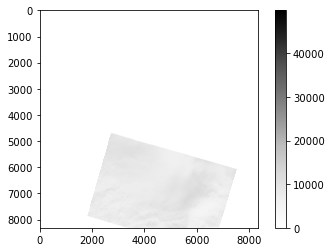

20200305_192538_50_106f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6308, 6816)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200305_192538_50_106f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200305_192538_50_106f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23891.42117899068


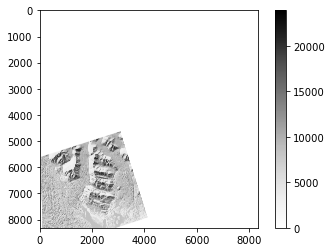

20200324_201448_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5068, 620)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200324_201448_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200324_201448_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14239.02432873362


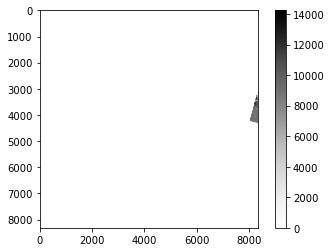

20200312_192203_93_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8196, 5032)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_192203_93_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_192203_93_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21862.13539184182


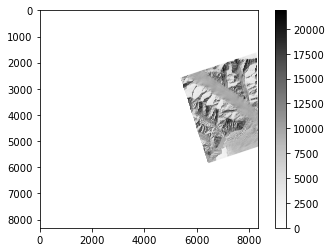

20200302_192329_49_106b_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6368, 6931)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_192329_49_106b_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_192329_49_106b_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11843.927135114602


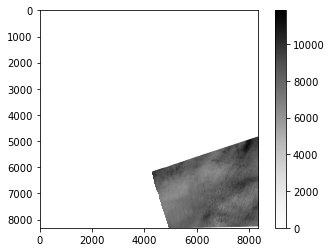

20200311_200118_0e26_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4922, 3787)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_200118_0e26_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_200118_0e26_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 25938.48521437701


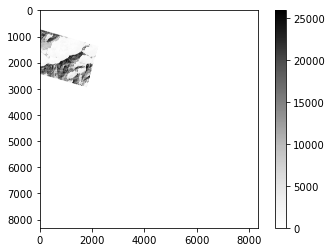

20200326_173536_0f3c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4697, 588)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_173536_0f3c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_173536_0f3c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18025.136443598534


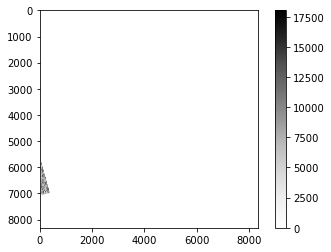

20200326_172809_0f36_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2019, 3672)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_172809_0f36_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_172809_0f36_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18360.073938885384


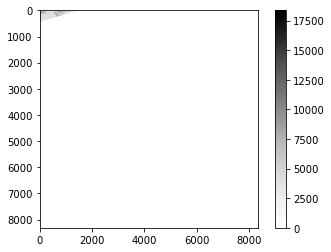

20200302_192333_60_106b_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6650, 9863)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_192333_60_106b_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_192333_60_106b_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12890.72728906384


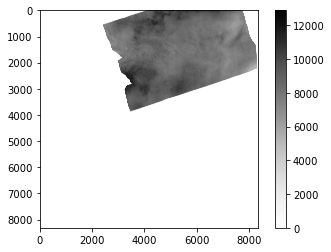

20200317_192537_46_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8080, 3170)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_192537_46_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_192537_46_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14304.79669792085


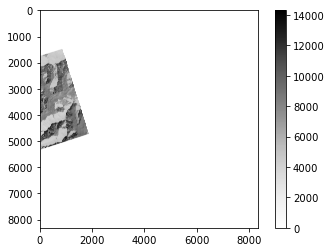

20200320_201429_103e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (371, 2164)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200320_201429_103e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200320_201429_103e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11116.318919516934


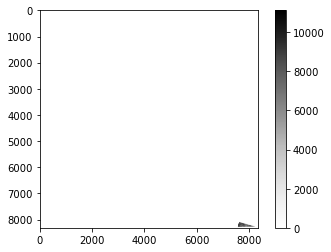

20200326_201139_1006_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3532, 2032)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201139_1006_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201139_1006_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16880.23089561456


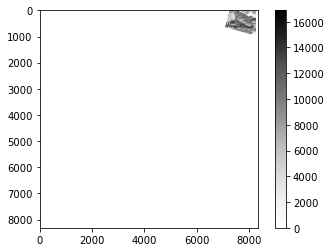

20200315_201745_1032_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5189, 5850)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_201745_1032_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_201745_1032_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22446.83655648948


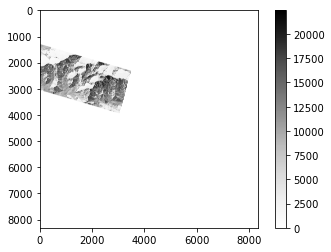

20200303_192412_27_106c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4700, 9780)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200303_192412_27_106c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200303_192412_27_106c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14110.750168446983


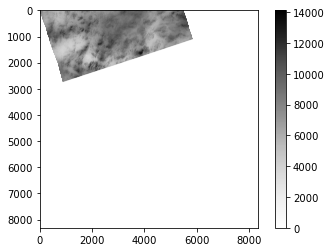

20200322_192824_82_106a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4687, 914)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200322_192824_82_106a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200322_192824_82_106a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17456.55169383773


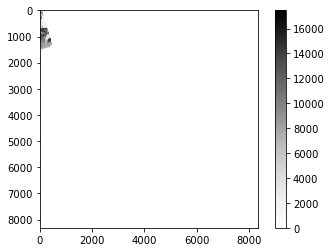

20200317_201019_100a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (679, 2859)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_201019_100a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_201019_100a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12346.398975817778


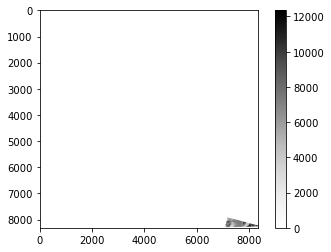

20200302_204059_14_105a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7639, 9466)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_204059_14_105a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_204059_14_105a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 59351.65299748041


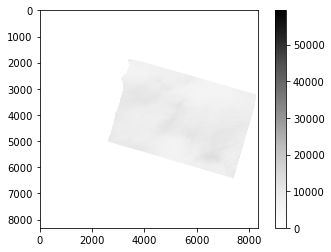

20200324_201449_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5076, 1334)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200324_201449_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200324_201449_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11859.71387034342


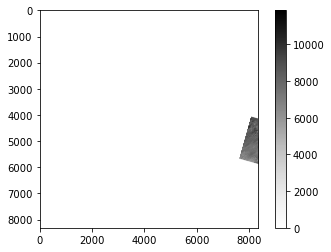

20200302_192331_54_106b_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8334, 8439)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_192331_54_106b_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_192331_54_106b_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12925.19826993561


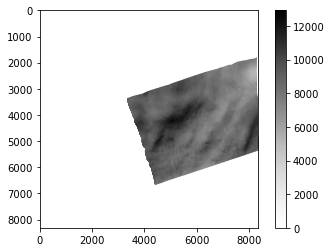

20200318_192552_65_106a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1642, 5754)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200318_192552_65_106a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200318_192552_65_106a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11974.523432428627


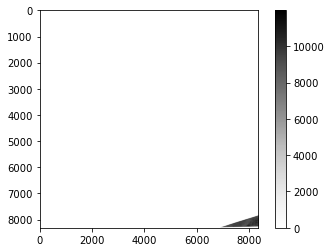

20200326_173534_0f3c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (476, 1798)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_173534_0f3c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_173534_0f3c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14684.562292720551


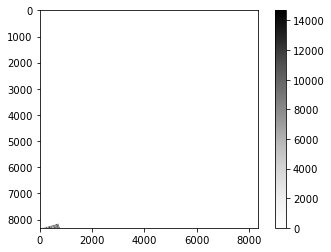

20200317_201848_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5281, 1244)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_201848_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_201848_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15970.738540594528


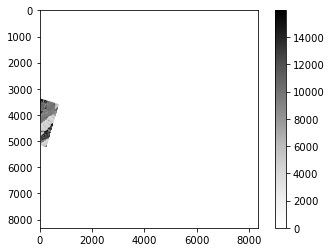

20200311_200119_0e26_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5000, 3060)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_200119_0e26_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_200119_0e26_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23103.354741524552


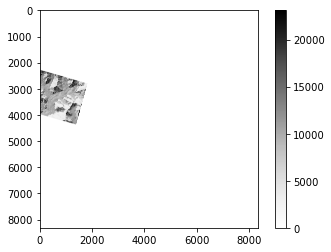

20200322_192822_72_106a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7852, 2341)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200322_192822_72_106a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200322_192822_72_106a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18408.773846408025


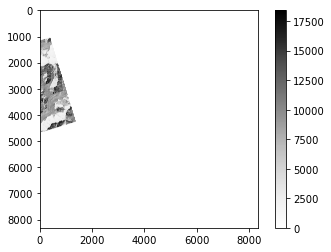

20200316_172911_0f32_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4854, 6495)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_172911_0f32_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_172911_0f32_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16241.624120687928


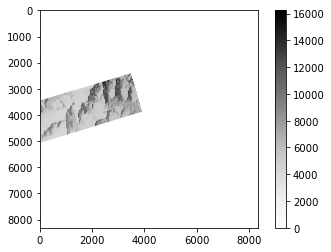

20200326_201846_103d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (815, 7693)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201846_103d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201846_103d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10314.175070794541


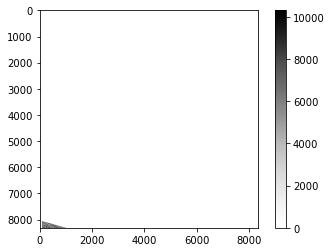

20200306_204117_75_105d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6416, 9008)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200306_204117_75_105d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200306_204117_75_105d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21821.77764977894


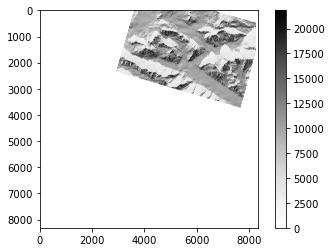

20200322_204124_27_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (398, 8573)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200322_204124_27_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200322_204124_27_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 11747.016112478721


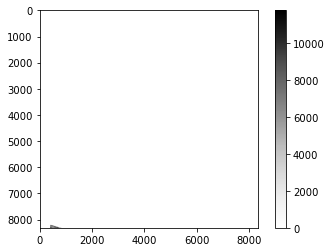

20200316_172908_0f32_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3446, 8368)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_172908_0f32_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_172908_0f32_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 13556.297644470656


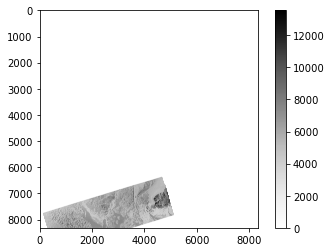

20200327_201624_1032_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (559, 9001)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200327_201624_1032_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200327_201624_1032_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8452.61761328664


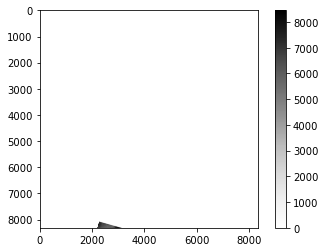

20200328_192356_37_1062_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7882, 350)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200328_192356_37_1062_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200328_192356_37_1062_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16095.572445040605


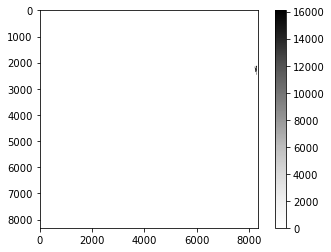

20200313_192304_64_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6711, 6588)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200313_192304_64_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200313_192304_64_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8706.72526397452


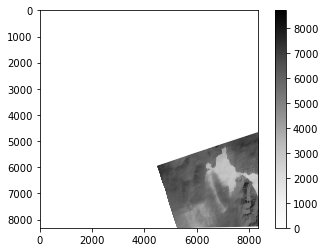

20200312_201600_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5140, 6198)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201600_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201600_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20658.127604053327


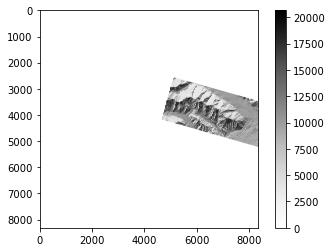

20200326_201146_1006_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1027, 6208)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201146_1006_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201146_1006_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12571.045766939744


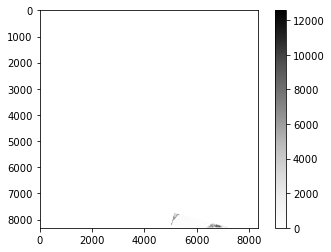

20200325_193029_62_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7817, 1919)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200325_193029_62_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200325_193029_62_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14910.160612490228


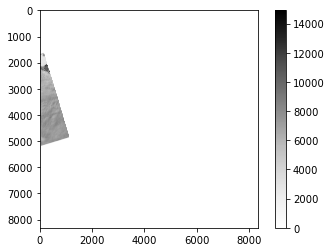

20200317_192535_36_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6759, 4597)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_192535_36_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_192535_36_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14485.632345370468


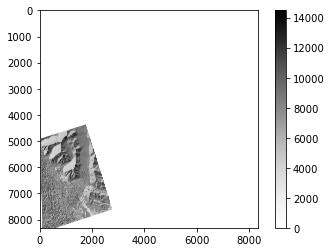

20200325_200931_100a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4930, 2234)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200325_200931_100a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200325_200931_100a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18483.569812706643


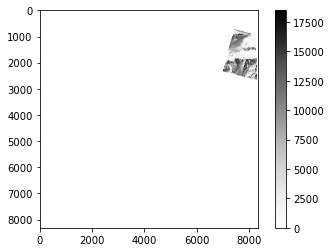

20200327_195953_0e26_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (467, 2677)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200327_195953_0e26_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200327_195953_0e26_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8954.537448297358


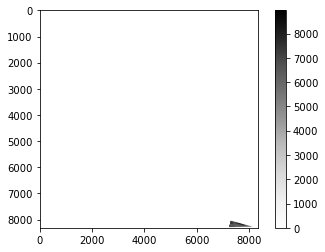

20200312_201224_101f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5033, 7401)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_201224_101f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_201224_101f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20062.310844210355


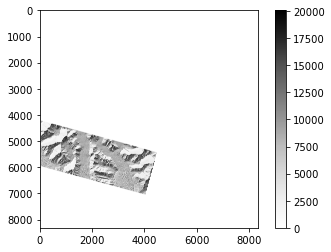

20200323_173025_0f49_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3268, 3558)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200323_173025_0f49_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200323_173025_0f49_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19395.44913034582


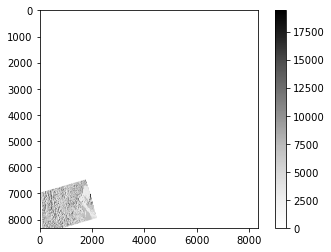

20200303_192408_19_106c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8272, 10026)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200303_192408_19_106c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200303_192408_19_106c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23452.822952197483


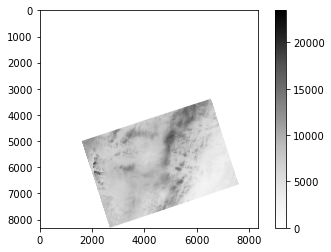

20200322_192820_61_106a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7501, 3779)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200322_192820_61_106a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200322_192820_61_106a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18131.64897474931


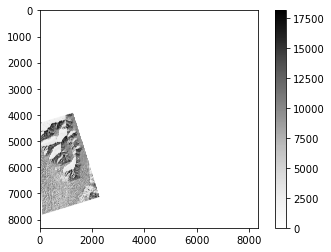

20200313_192306_73_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8183, 8058)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200313_192306_73_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200313_192306_73_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15150.131884995968


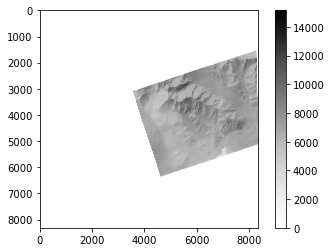

20200317_201845_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3899, 2526)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200317_201845_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200317_201845_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18367.430433415673


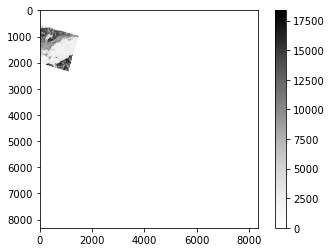

20200316_172912_0f32_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4848, 5876)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_172912_0f32_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_172912_0f32_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18641.39834733189


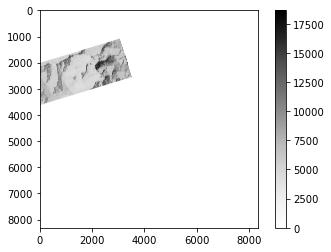

20200315_192403_61_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5126, 9836)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_192403_61_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_192403_61_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20317.19206652651


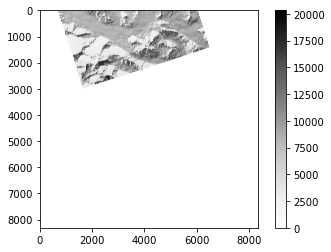

20200303_192410_23_106c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8189, 10010)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200303_192410_23_106c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200303_192410_23_106c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17239.449395497657


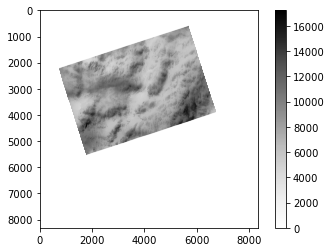

20200315_192401_56_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7981, 9774)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_192401_56_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_192401_56_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20451.048972367123


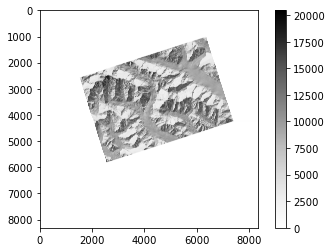

20200312_192206_01_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5231, 6459)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200312_192206_01_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200312_192206_01_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21897.19063216705


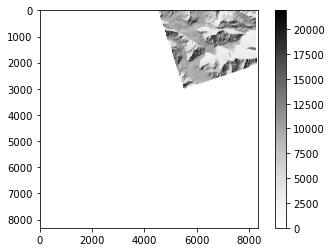

20200313_203933_42_105a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7595, 6133)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200313_203933_42_105a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200313_203933_42_105a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 52767.8506066268


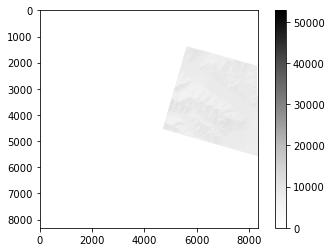

20200323_173027_0f49_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4715, 2366)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200323_173027_0f49_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200323_173027_0f49_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23585.684378960334


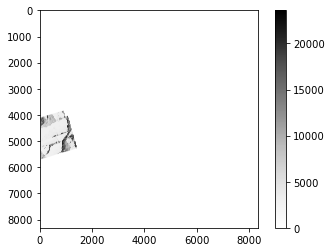

20200325_200930_100a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3869, 1523)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200325_200930_100a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200325_200930_100a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16631.548308685953


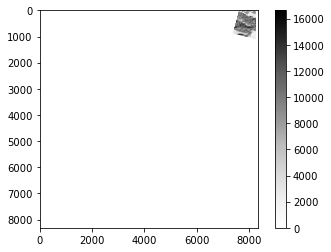

20200315_192357_44_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2927, 8501)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_192357_44_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_192357_44_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17276.73415432685


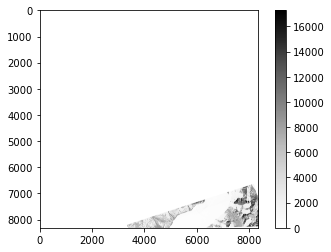

20200324_201450_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4660, 2043)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200324_201450_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200324_201450_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14224.496835981028


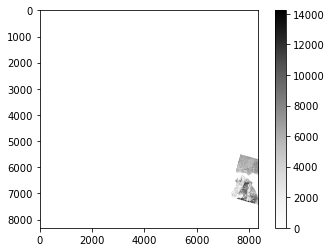

20200311_200117_0e26_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2572, 4474)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_200117_0e26_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_200117_0e26_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 24442.02830607889


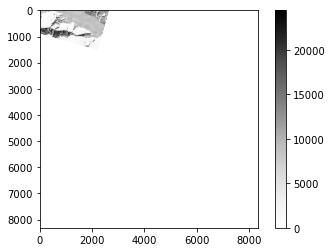

20200311_200120_0e26_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5000, 2350)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200311_200120_0e26_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200311_200120_0e26_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23771.646331337266


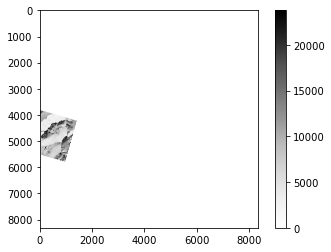

20200306_192610_56_106b_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8132, 9969)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200306_192610_56_106b_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200306_192610_56_106b_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 24326.723713698553


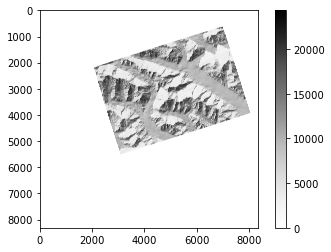

20200330_172422_1_104a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1485, 3338)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172422_1_104a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172422_1_104a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 0.0


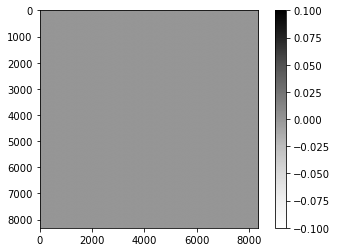

20200324_201451_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2285, 2728)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200324_201451_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200324_201451_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15252.724933803467


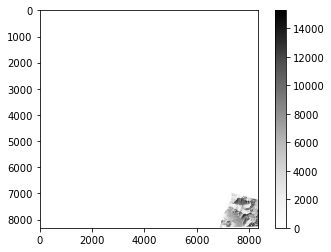

20200301_192300_03_106f_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8240, 2352)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200301_192300_03_106f_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200301_192300_03_106f_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16175.280451953106


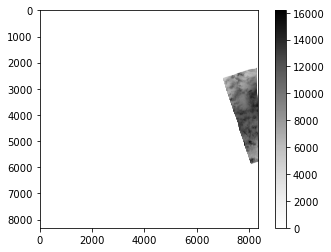

20200302_192327_43_106b_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1763, 5503)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200302_192327_43_106b_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200302_192327_43_106b_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 9660.636281391193


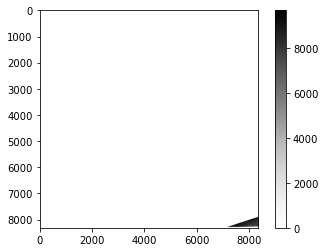

20200322_192818_51_106a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2717, 5183)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200322_192818_51_106a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200322_192818_51_106a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17438.614755817147


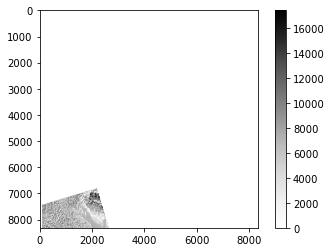

20200325_193025_42_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1714, 4702)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200325_193025_42_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200325_193025_42_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8863.331694435003


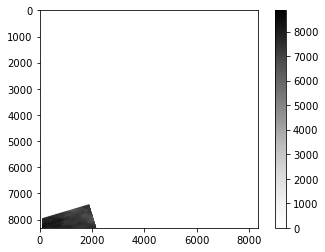

20200314_201149_0f28_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3592, 2354)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200314_201149_0f28_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200314_201149_0f28_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18650.259485109327


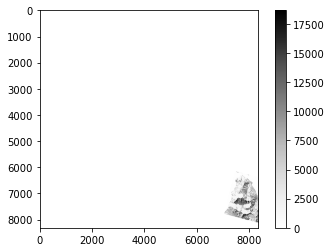

20200315_192405_67_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (445, 9375)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_192405_67_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_192405_67_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12284.129763208439


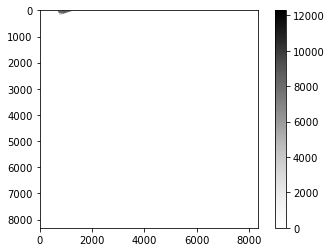

20200325_200932_100a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4930, 2874)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200325_200932_100a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200325_200932_100a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17047.147902383866


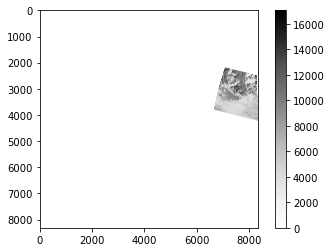

20200326_201141_1006_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4955, 3464)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201141_1006_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201141_1006_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16621.132755652245


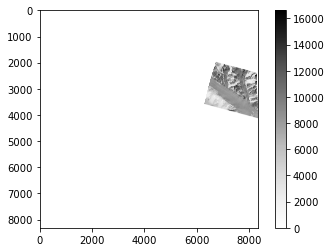

20200303_204230_98_1058_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5034, 4855)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200303_204230_98_1058_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200303_204230_98_1058_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 28779.05648564223


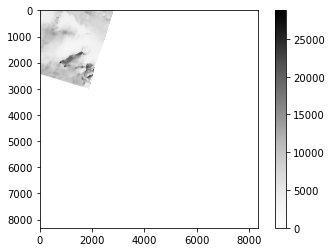

20200322_204116_11_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2736, 9158)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200322_204116_11_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200322_204116_11_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18037.139691982455


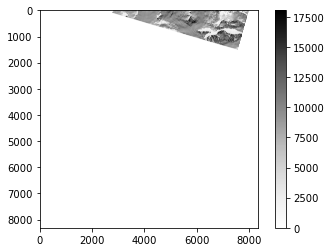

20200328_203802_97_105d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (263, 9498)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200328_203802_97_105d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200328_203802_97_105d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 6152.3146311794635


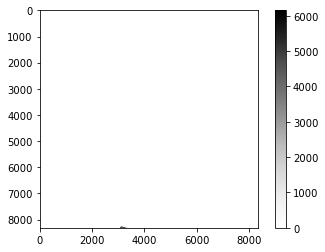

20200320_201519_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2760, 9079)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200320_201519_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200320_201519_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 13404.337329034117


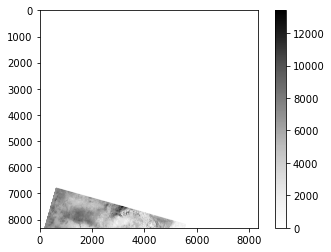

20200320_201513_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2109, 9055)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200320_201513_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200320_201513_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18733.52994952562


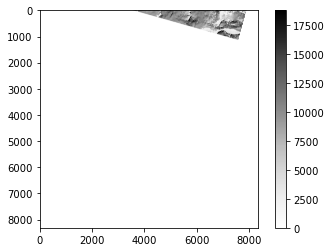

20200304_192442_48_1068_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8269, 7968)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200304_192442_48_1068_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200304_192442_48_1068_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14782.274949416911


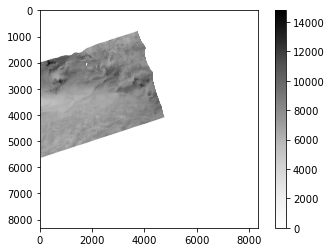

20200325_201753_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2942, 6965)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200325_201753_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200325_201753_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16542.196567351028


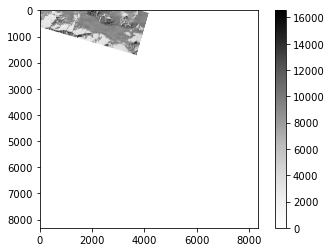

20200315_192359_50_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7609, 9839)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200315_192359_50_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200315_192359_50_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19016.47166023776


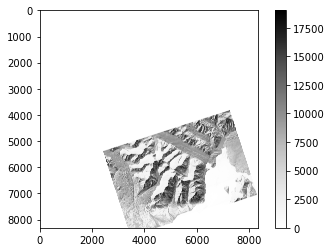

20200320_201515_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5005, 9014)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200320_201515_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200320_201515_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22229.78392551838


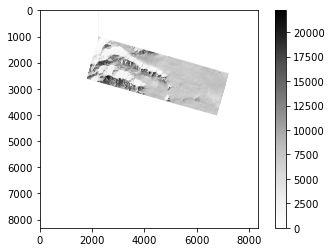

20200319_192626_46_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4994, 7909)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200319_192626_46_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200319_192626_46_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16840.18477099883


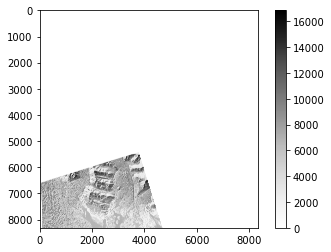

20200326_201839_103d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1718, 8939)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201839_103d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201839_103d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14555.07018548199


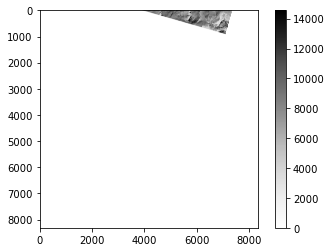

20200328_192358_47_1062_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4261, 1778)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200328_192358_47_1062_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200328_192358_47_1062_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16392.39498066137


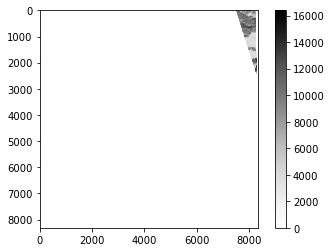

20200326_173535_0f3c_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2687, 1192)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_173535_0f3c_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_173535_0f3c_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16918.89743772382


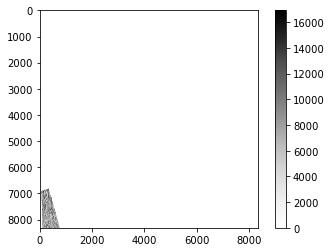

20200330_172811_0f2a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4889, 528)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172811_0f2a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172811_0f2a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15866.762591029652


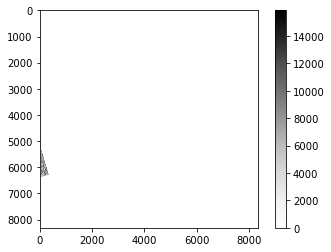

20200326_172808_0f36_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4242, 4321)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_172808_0f36_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_172808_0f36_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22649.788654602668


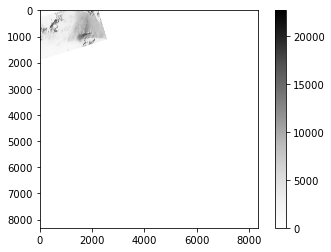

20200329_201723_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2286, 9085)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_201723_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_201723_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16251.14148342038


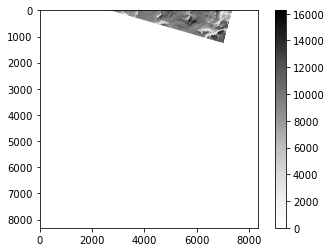

20200326_201144_1006_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4980, 4879)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201144_1006_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201144_1006_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 13671.68138460904


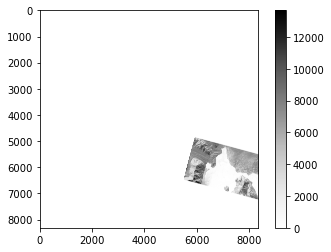

20200329_201729_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2578, 8181)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_201729_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_201729_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 13501.199060558207


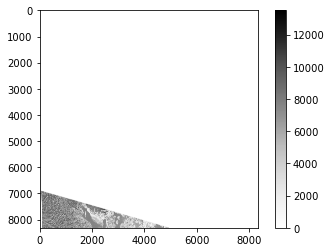

20200325_201754_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5162, 6252)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200325_201754_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200325_201754_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19832.960875348526


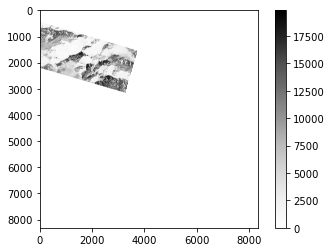

20200326_172803_0f36_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3630, 7539)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_172803_0f36_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_172803_0f36_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19094.91220397434


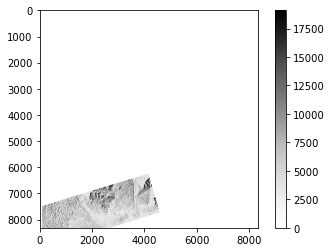

20200319_192630_59_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7485, 5072)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200319_192630_59_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200319_192630_59_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19020.480480979902


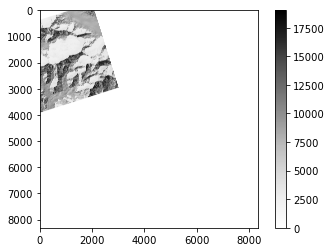

20200318_192554_74_106a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6431, 7244)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200318_192554_74_106a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200318_192554_74_106a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14778.321394163659


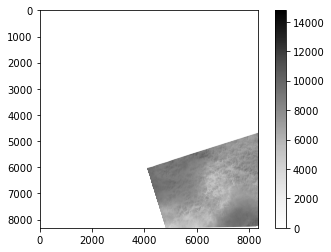

20200320_201514_1003_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4495, 9040)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200320_201514_1003_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200320_201514_1003_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18933.63866740875


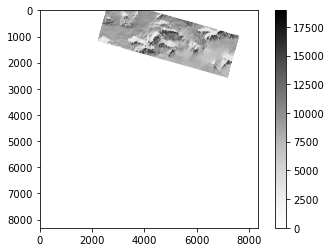

20200323_173026_0f49_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4753, 2958)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200323_173026_0f49_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200323_173026_0f49_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22883.89137868579


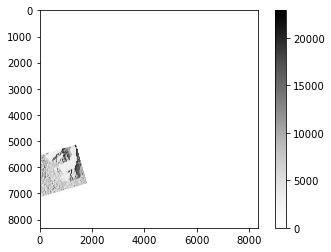

20200326_172807_0f36_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4877, 5008)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_172807_0f36_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_172807_0f36_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23028.579095648547


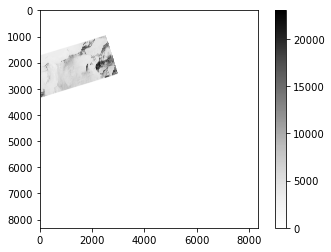

20200326_172802_0f36_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1460, 8185)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_172802_0f36_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_172802_0f36_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12525.232802122659


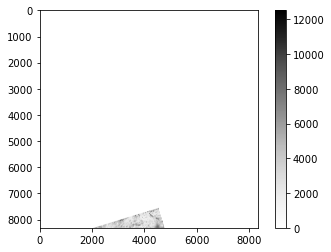

20200326_201140_1006_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4950, 2736)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201140_1006_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201140_1006_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18168.826509170067


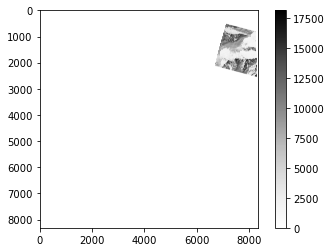

20200328_203754_82_105d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2694, 4929)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200328_203754_82_105d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200328_203754_82_105d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12883.066483738014


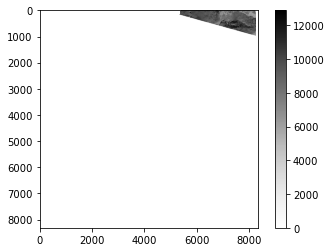

20200326_172806_0f36_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4882, 5618)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_172806_0f36_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_172806_0f36_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23535.78098315715


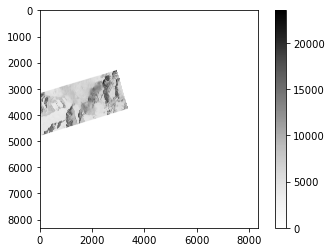

20200316_203620_90_1059_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7558, 9488)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_203620_90_1059_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_203620_90_1059_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15881.019312461067


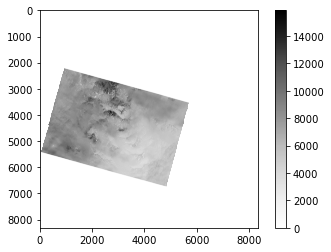

20200325_193027_52_106e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6487, 3284)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200325_193027_52_106e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200325_193027_52_106e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 8992.099044868673


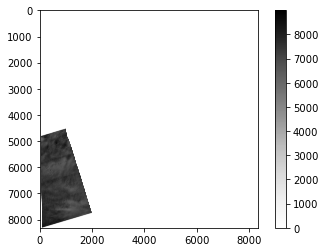

20200326_172804_0f36_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4882, 6913)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_172804_0f36_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_172804_0f36_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20487.119026891698


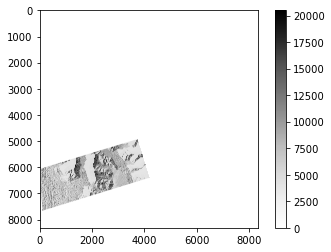

20200316_203622_95_1059_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5621, 8173)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_203622_95_1059_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_203622_95_1059_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 13830.399892783127


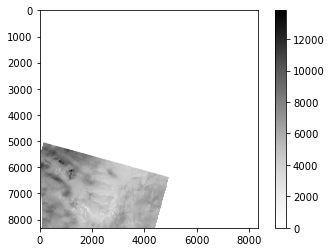

20200330_172809_0f2a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1633, 1792)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172809_0f2a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172809_0f2a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15066.97224317457


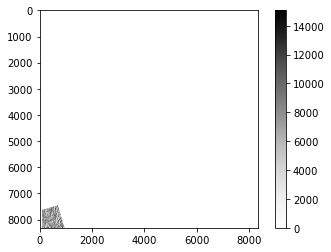

20200326_201143_1006_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4966, 4199)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201143_1006_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201143_1006_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14727.84053979021


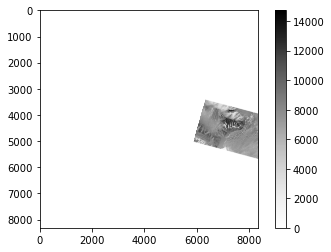

20200329_172825_0f33_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2571, 6419)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_172825_0f33_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_172825_0f33_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 24030.93203362675


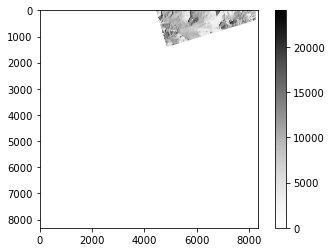

20200330_192458_96_1065_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1820, 5787)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_192458_96_1065_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_192458_96_1065_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15646.723126090688


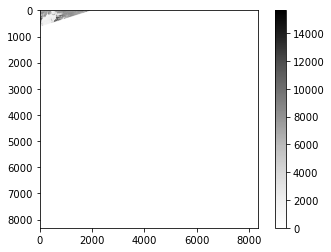

20200329_172820_0f33_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3063, 2742)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_172820_0f33_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_172820_0f33_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17845.761208214833


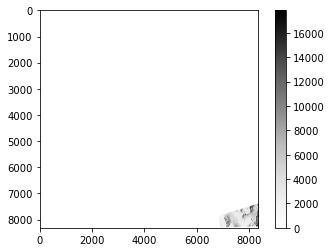

20200330_172423_104a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4972, 4710)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172423_104a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172423_104a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22794.68583233883


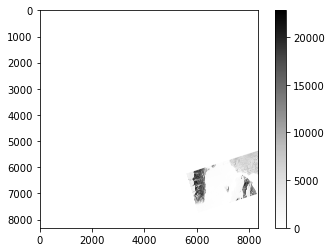

20200330_172428_104a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (2102, 7888)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172428_104a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172428_104a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22504.421467240205


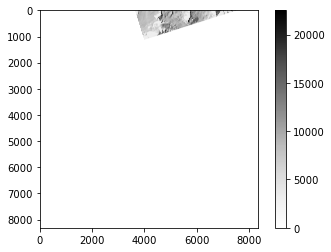

20200329_172821_0f33_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4833, 3394)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_172821_0f33_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_172821_0f33_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16310.627549011911


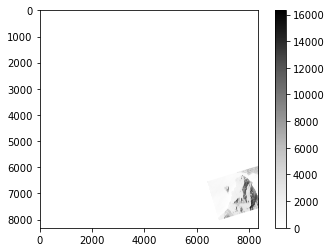

20200318_192556_84_106a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7890, 8660)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200318_192556_84_106a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200318_192556_84_106a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15468.467935607267


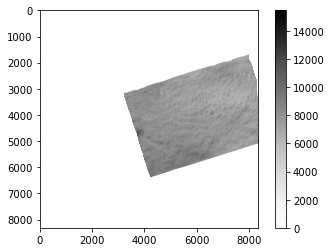

20200329_172823_0f33_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4830, 5221)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_172823_0f33_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_172823_0f33_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22166.40104571825


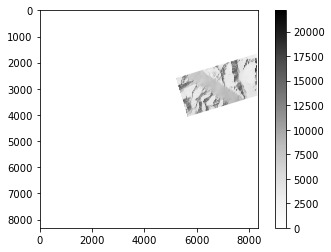

20200326_201844_103d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5113, 9059)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201844_103d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201844_103d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12599.31236558288


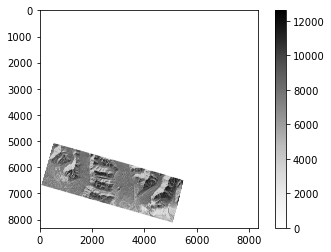

20200322_204122_23_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5065, 9563)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200322_204122_23_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200322_204122_23_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17828.02487412


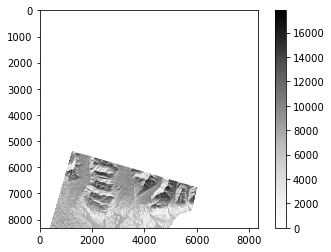

20200316_192433_65_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8033, 9437)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_192433_65_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_192433_65_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 9784.850878764308


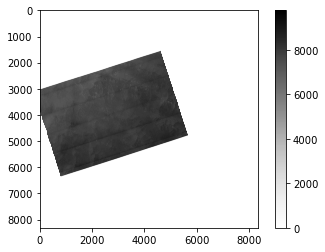

20200326_201145_1006_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3394, 5568)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201145_1006_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201145_1006_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 14303.221525252025


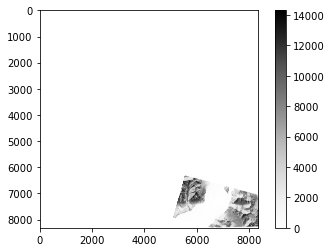

20200329_201724_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4671, 9100)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_201724_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_201724_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16500.621097885105


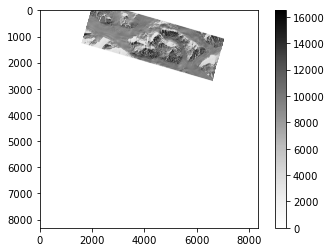

20200329_172824_0f33_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4785, 5811)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_172824_0f33_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_172824_0f33_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23529.89427458574


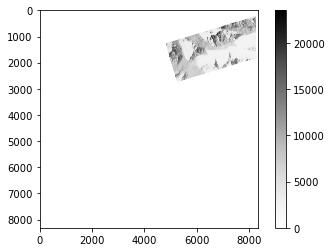

20200326_172805_0f36_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4890, 6261)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_172805_0f36_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_172805_0f36_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19317.770063088334


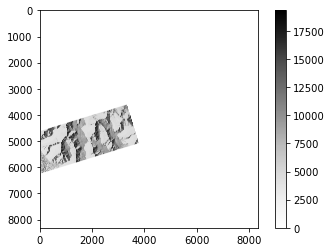

20200330_172426_104a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4945, 6592)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172426_104a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172426_104a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23237.893132962396


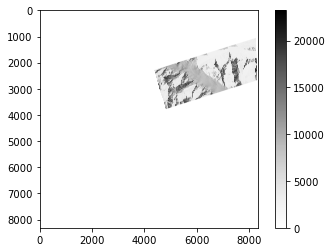

20200326_201840_103d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4093, 9060)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201840_103d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201840_103d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15352.577030480257


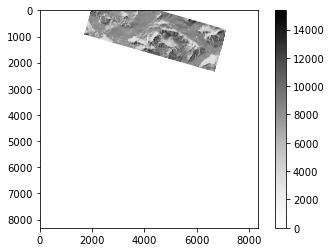

20200330_172427_104a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4292, 7242)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172427_104a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172427_104a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23030.222834384273


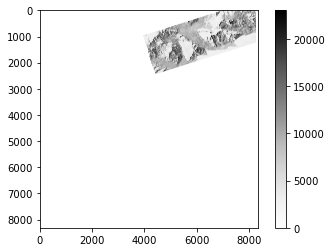

20200329_201726_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5068, 9085)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_201726_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_201726_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16592.325388876037


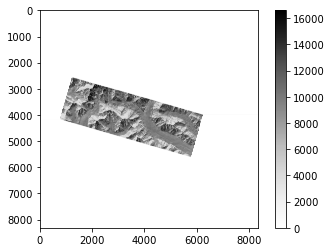

20200319_192628_52_1069_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7929, 6495)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200319_192628_52_1069_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200319_192628_52_1069_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18409.51344124964


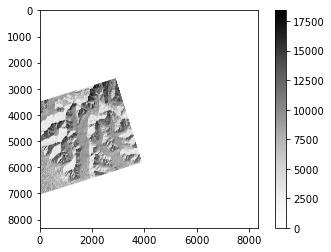

20200326_201842_103d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5043, 9049)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201842_103d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201842_103d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15451.278761927


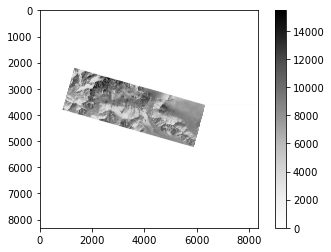

20200330_172425_104a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5000, 6003)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172425_104a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172425_104a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 21998.165590098677


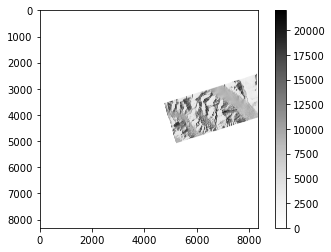

20200326_201845_103d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3193, 8415)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201845_103d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201845_103d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12053.00488458425


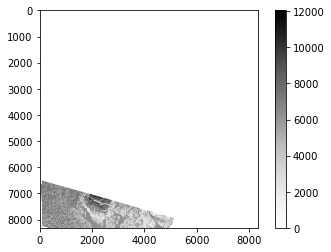

20200316_192431_56_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6655, 9842)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_192431_56_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_192431_56_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 10228.227334372965


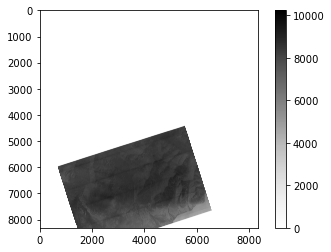

20200329_201727_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5075, 9082)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_201727_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_201727_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16199.586544481746


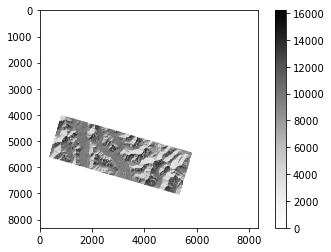

20200318_192558_94_106a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6062, 9598)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200318_192558_94_106a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200318_192558_94_106a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15149.642043952106


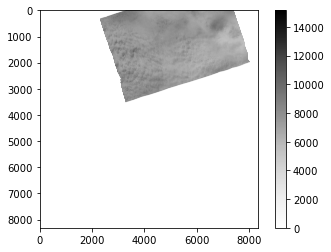

20200326_201843_103d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5043, 9085)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201843_103d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201843_103d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 13756.267888196544


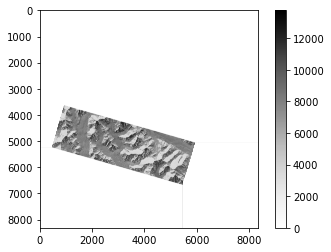

20200329_201725_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5069, 9091)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_201725_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_201725_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18938.07455280809


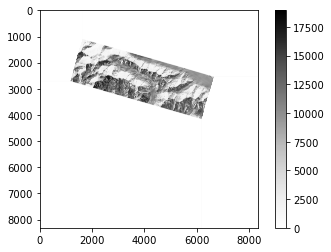

20200306_192608_50_106b_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (8227, 9164)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200306_192608_50_106b_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200306_192608_50_106b_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23417.308611238106


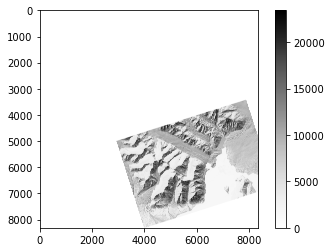

20200329_172822_0f33_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4821, 4006)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_172822_0f33_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_172822_0f33_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17876.404693098466


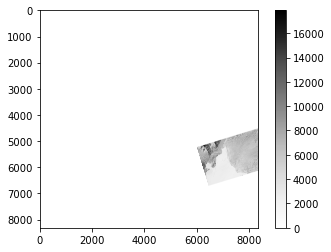

20200329_201728_1027_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4963, 8888)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_201728_1027_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_201728_1027_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15547.31154490382


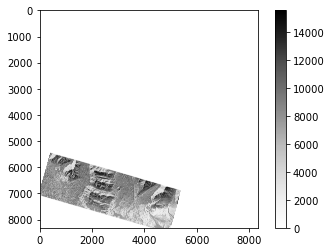

20200329_172822_1_0f33_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4834, 4608)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_172822_1_0f33_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_172822_1_0f33_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 19866.575153794183


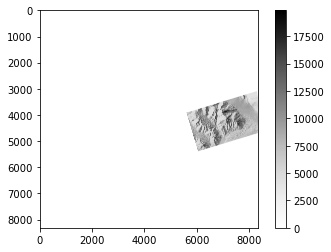

20200328_203800_93_105d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4892, 9071)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200328_203800_93_105d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200328_203800_93_105d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17367.22560687938


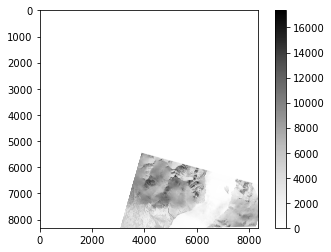

20200330_172810_0f2a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3847, 1162)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172810_0f2a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172810_0f2a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18238.052720718748


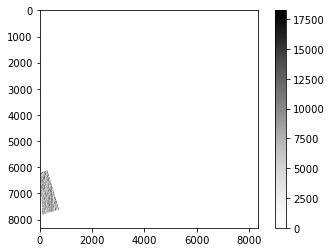

20200323_173028_0f49_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4722, 1595)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200323_173028_0f49_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200323_173028_0f49_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 23432.421811230706


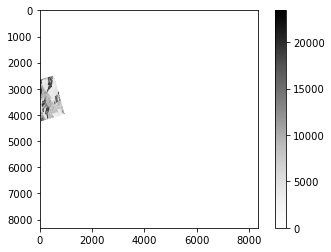

20200328_203756_85_105d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7381, 6315)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200328_203756_85_105d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200328_203756_85_105d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 15872.707153952191


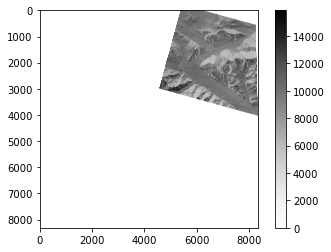

20200329_172826_0f33_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (367, 7034)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200329_172826_0f33_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200329_172826_0f33_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22175.166016872725


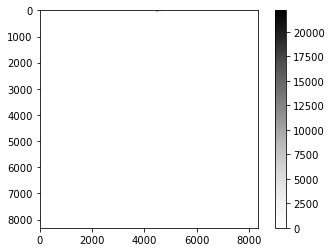

20200328_203758_89_105d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7574, 7722)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200328_203758_89_105d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200328_203758_89_105d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17207.801747970407


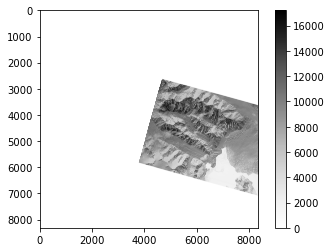

20200330_201436_0f25_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (1101, 526)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_201436_0f25_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_201436_0f25_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 0.0


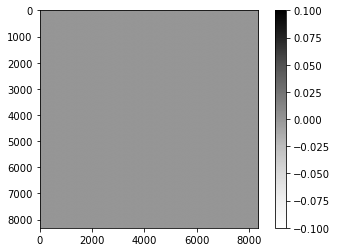

20200330_192456_86_1065_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (6602, 7310)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_192456_86_1065_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_192456_86_1065_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17101.04441519982


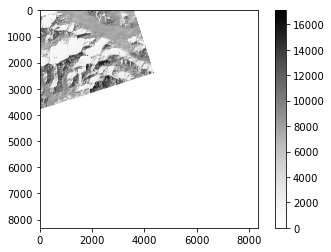

20200330_192450_56_1065_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (955, 9719)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_192450_56_1065_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_192450_56_1065_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 6983.103530105549


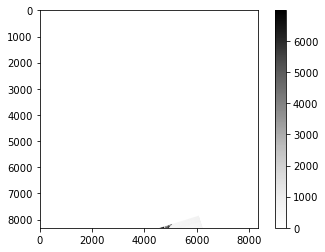

20200322_204120_19_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7636, 9523)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200322_204120_19_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200322_204120_19_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18355.597773960053


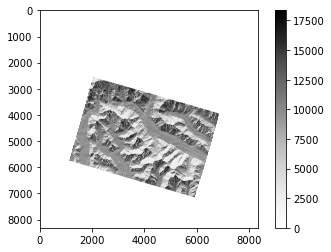

20200326_201841_103d_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5042, 9040)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200326_201841_103d_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200326_201841_103d_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 17519.15272501245


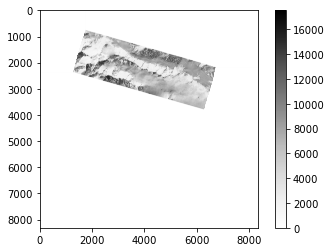

20200330_172422_104a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3698, 4056)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172422_104a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172422_104a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 22058.383383648652


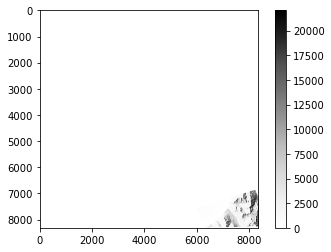

20200330_172424_104a_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (4963, 5372)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_172424_104a_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_172424_104a_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 20371.524876313873


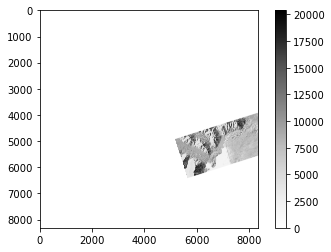

20200330_192454_76_1065_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7918, 8766)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_192454_76_1065_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_192454_76_1065_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16654.362056478545


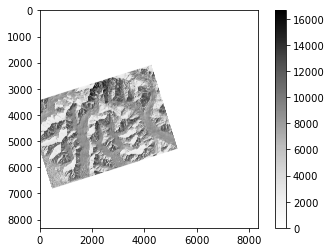

20200330_192452_66_1065_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5743, 9701)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200330_192452_66_1065_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200330_192452_66_1065_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 16029.38496703934


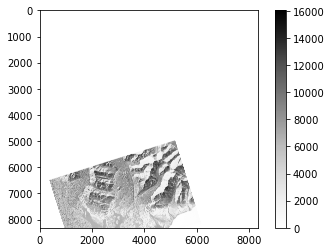

20200322_204118_15_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7418, 9580)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200322_204118_15_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200322_204118_15_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 18320.029534955967


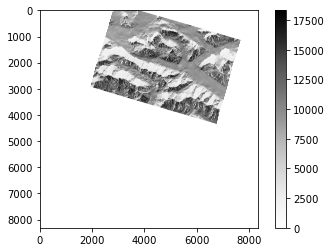

20200316_192435_74_1063_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (5910, 7972)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200316_192435_74_1063_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200316_192435_74_1063_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 9352.044786896377


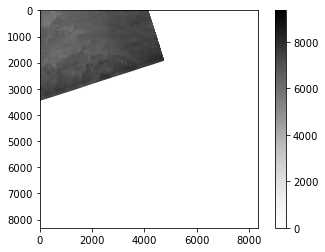

20200314_173231_0f2e_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (3130, 2732)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200314_173231_0f2e_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200314_173231_0f2e_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 34010.11013979124


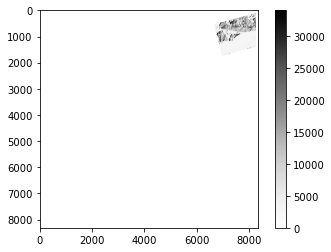

20200304_203527_08_1064_3B_AnalyticMS_SR_harmonized_clip.tif
32607
EPSG:32607
4
Image dimensions: (7506, 6210)
Resample to DSM dimensions: (8317, 8360)
Save resampled image to 20200304_203527_08_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif
20200304_203527_08_1064_3B_AnalyticMS_SR_harmonized_clip.tif resampled
0.0 12935.652396045254


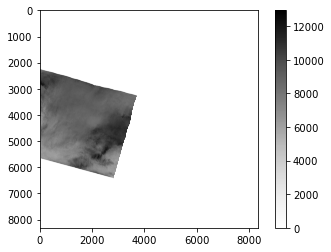

All images resampled.
outpath /Volumes/SURGE_DISK/PS_downloads_SK/download/PSScene/standard_grid/
outfile 20200304_203527_08_1064_3B_AnalyticMS_SR_harmonized_clip_5m.tif


In [10]:
imgpath = '/Volumes/SURGE_DISK/PS_downloads_SK/download/PSScene/' # enter path to folder with all the images to resample
outpath = '/Volumes/SURGE_DISK/PS_downloads_SK/download/PSScene/standard_grid/' # output files
if not os.path.exists(outpath):
    os.mkdir(outpath)
    
    
for imgname in os.listdir(imgpath): # loop through all images
    if imgname.endswith("SR_harmonized_clip.tif"):
        print(imgname)
        
        # create folder to hold reprojected images
        if not os.path.exists(imgpath + 'reprojected/'):
            os.mkdir(imgpath + 'reprojected/')
        
        # grab the CRS for the image and the DEM
        raster = gdal.Open(imgpath + imgname)
        projstg = raster.GetProjection()
        imgcrs = projstg.split('EPSG')[-1][3:8]
        print(imgcrs)
        print(dsm.crs)
        # if they aren't equal, then reproject and copy
        if 'EPSG:' + imgcrs != str(dsm.crs):
            gdal.Warp(imgpath + 'reprojected/' + imgname, imgpath + imgname, dstSRS=str(dsm.crs))
            print('reprojecting' + imgname)
        else:
            # otherwise just copy
            shutil.copy(imgpath + imgname, imgpath + 'reprojected/'+ imgname)
    
        # open the reprojected image
        img = rio.open(imgpath + 'reprojected/'+ imgname) # open using rasterio
        img_data = img.read() # grab the NIR band, 4

        # remove those that don't overlap the glacier at all
        try:
            # crop to glacier outline
            out_image, out_transform = mask(img, [mapping(aoi[0])], crop=True)
            crop_array = out_image[0,:,:]
            
            plt.imshow(crop_array); plt.colorbar(); plt.title(newfile)  # plot
            plt.show()
            
            coverage = np.count_nonzero(crop_array[~np.isnan(crop_array)]) # count coverage
            
            # If image is empty, remove:
            if np.nanmax(crop_array) == 0 or coverage == 0:
                print('remove empty tile',imgname)
                os.remove(imgpath + 'reprojected/'+ imgname)
        except Exception:
            continue
            
        # select band and gather image dimensinos
        print(len(img_data))
        if len(img_data) == 4:
            nir = img_data[3]
        elif len(img_data) == 1:
            nir = img_data[0]
        print("Image dimensions:",nir.shape)
        # grab the x and y grid values for the DSM
        img_x = np.linspace(img.bounds.left, img.bounds.right, num=np.shape(nir)[1])
        img_y = np.linspace(img.bounds.top, img.bounds.bottom, num=np.shape(nir)[0])
        
        # resample
        f = interp2d(img_x, img_y, nir) # create img interpolation object
        nir_resamp = np.zeros(np.shape(elev)) # initialize resampled image with DSM shape
        nir_resamp = f(dsm_x,dsm_y) # resample the NIR data to the DSM coordinates
        nir_resamp = np.flipud(nir_resamp) # flip up down
        print("Resample to DSM dimensions:",elev.shape)
        
        if True:
            # save the resampled image to georeferenced tif file
            outfile = imgname[:-4]+'_'+str(round(dsm_resolution))+'m.tif' # generate new filename with 5m suffix
            print("Save resampled image to", outfile)
            with rio.open(outpath+outfile,'w',
                                driver='GTiff',
                                height=nir_resamp.shape[0],
                                width=nir_resamp.shape[1],
                                dtype=nir_resamp.dtype,
                                count=1,
                                crs=dsm.crs,
                                transform=dsm.transform) as dst:
                    dst.write(nir_resamp, 1)
            print(imgname + ' resampled')
            print(np.nanmin(nir_resamp), np.nanmax(nir_resamp))
            
            plt.imshow(nir_resamp, cmap='Greys')
            plt.colorbar()
            plt.show()
            
print("All images resampled.")

print("outpath", outpath)
print("outfile", outfile)

